<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Word Embeddings - A Numerric Building Block of Natural Language Processing 
</h1>



<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

# Description of this notebook

Words can be represented by Vectors, so that co-occurrence relations among words in the corpus can be approximated 
through nummeric measurements, such as the cosine similarity, of their vector representations. 

In this notebook, we use `gensim` package to describe basic operations of word-embeddings. `Gensim` is a python package for topic modeling (LDA) in Natural Language Processing, and also provides a number of useful tools, such as word-embeddings. 

We first import `Word2Vec` from `gensim` as follows.

In [3]:
from gensim.models import Word2Vec

`Word2Vec` provides an easy-to-use interface to use `NLTK` corpora (Natural Language Toolkit). We import its movie review corpora and Brown corpoa. 

In [4]:
from nltk.corpus import movie_reviews, brown

Word Vectors representing word co-occurrence relations in movie reviews are easily imported by one Python line

In [5]:
reviewVec = Word2Vec(movie_reviews.sents())

The top 10 most similar words of `way` in the movie review corpora are listed as follows.

In [17]:
reviewVec.wv.most_similar('way', topn=10)

[('situation', 0.7217198610305786),
 ('audience', 0.6800363063812256),
 ('viewer', 0.6794217228889465),
 ('material', 0.6672236919403076),
 ('things', 0.6663079261779785),
 ('money', 0.656428337097168),
 ('thing', 0.6408901214599609),
 ('place', 0.6369563341140747),
 ('mind', 0.6345070600509644),
 ('everything', 0.630621612071991)]

We can compare the results of using Brown corpora.

In [18]:
brownVec = Word2Vec(brown.sents())

In [19]:
brownVec.wv.most_similar('way', topn=10)

[('place', 0.9372531175613403),
 ('work', 0.8732692003250122),
 ('mind', 0.8656002283096313),
 ('job', 0.864067792892456),
 ('best', 0.8583147525787354),
 ('money', 0.8420649170875549),
 ('trouble', 0.8207899332046509),
 ('world', 0.8207452297210693),
 ('play', 0.8187777400016785),
 ('show', 0.8178919553756714)]

Co-occurrence relations are determined (or biased) by the corpora. We can compare the results of using Brown corpora.

In [11]:
reviewVec.wv.most_similar('titanic', topn=10)

[('cbs', 0.8808615207672119),
 ('tragedy', 0.8656440377235413),
 ('spawn', 0.8623498678207397),
 ('exorcist', 0.8506960272789001),
 ('fog', 0.8439337015151978),
 ('jackal', 0.8435090184211731),
 ('terror', 0.8384259939193726),
 ('disco', 0.8361891508102417),
 ('bottom', 0.8361430764198303),
 ('daddy', 0.82967609167099)]

We can compare the results of using Brown corpora.

In [16]:
brownVec.wv.most_similar('titanic', topn=10)

KeyError: "word 'titanic' not in vocabulary"

We have an error saying `titanic` is not a vocabulary in the Brown corpora. So, in real applications, we need to train word embeddings of a particular corpora. It is also simple to do this. Suppose we have 5 sentences as follows. 

In [21]:
snts = [
    ['why','do','so','many','egyptian','statues','have','broken','noses'],
    ['why','are','the','statues','noses','broken'],
    ['it','might','seem','inevitable','that','after','thousands','of','years','an','ancient','artifact','would','show','wear','and','tear'],
    ['but','this','simple','observation','led','bleiberg','to','uncover','a','widespread','pattern','of','deliberate','destruction',],
    ['which','pointed','to','a','complex','set','of','reasons','why','most','works','of','egyptian','art','came','to','be','defaced','in','the','first','place']
]

The vector representation of this 5 sentences can be easily trained by the following function call.

In [22]:
w2vModel = Word2Vec(snts, min_count=1)

We can see the top-level features by just using the `print` function. `vocab=55` means that there are 55 words, `size=100` means that the vector size is 100, `alpha` is used for adjusting the training process, its default starting value is 0.025, and decreases linearly after each training epoch.

In [23]:
print(w2vModel)

Word2Vec(vocab=55, size=100, alpha=0.025)


The vocabulary can be accessed and printed out.

In [24]:
words = list(w2vModel.wv.vocab)

In [25]:
print(words)

['why', 'do', 'so', 'many', 'egyptian', 'statues', 'have', 'broken', 'noses', 'are', 'the', 'it', 'might', 'seem', 'inevitable', 'that', 'after', 'thousands', 'of', 'years', 'an', 'ancient', 'artifact', 'would', 'show', 'wear', 'and', 'tear', 'but', 'this', 'simple', 'observation', 'led', 'bleiberg', 'to', 'uncover', 'a', 'widespread', 'pattern', 'deliberate', 'destruction', 'which', 'pointed', 'complex', 'set', 'reasons', 'most', 'works', 'art', 'came', 'be', 'defaced', 'in', 'first', 'place']


We can use the following formula to see the vector representation of a word

In [29]:
print(w2vModel.wv['why'])

[ 0.00427485  0.00441275  0.00255409  0.00202627 -0.00050255  0.0043992
  0.00024307  0.00179586 -0.00469578  0.00328591  0.00426067 -0.00166788
 -0.0010818  -0.00454732 -0.00091164  0.00415865 -0.00497226 -0.00012286
 -0.00158372  0.00360303  0.00378454  0.00041212 -0.00156512  0.00487666
 -0.00281729  0.00313119 -0.00121754 -0.00447247 -0.00247222 -0.0041467
 -0.002423   -0.00465613  0.00069313 -0.00092352 -0.00446304  0.00212158
 -0.00029413 -0.00080848 -0.00153188  0.00306576 -0.00321749  0.00444297
  0.00347846  0.0049444  -0.00486831  0.00334081  0.0009981   0.00037669
  0.00211021 -0.00077372  0.000602    0.00145691 -0.00274568 -0.00361109
 -0.00341518  0.00201899 -0.00357338 -0.00316214  0.00200657  0.00407336
 -0.00192875  0.00088354  0.00366989 -0.0016534  -0.00230223 -0.00293551
  0.00422935  0.00260978 -0.00386803  0.00249948  0.00459697  0.00392524
 -0.00051083  0.00377159 -0.00112835  0.00255559 -0.00419331 -0.00068565
  0.00166335 -0.00353934  0.00047319  0.00461651  0.0

Use the following formula to see the top 10 words with the highest cosine similarity values.

In [30]:
w2vModel.wv.most_similar('noses', topn=10)

[('have', 0.1572216898202896),
 ('uncover', 0.15669378638267517),
 ('thousands', 0.15641911327838898),
 ('artifact', 0.13198892772197723),
 ('most', 0.12799394130706787),
 ('an', 0.11888263374567032),
 ('the', 0.11818917095661163),
 ('might', 0.10809456557035446),
 ('set', 0.10588495433330536),
 ('which', 0.07290071249008179)]

We can save this model into a file `myModel.bin`, and load this file

In [31]:
w2vModel.save('myModel.bin')

In [32]:
myModel = Word2Vec.load('myModel.bin')

In [33]:
print(myModel)

Word2Vec(vocab=55, size=100, alpha=0.025)


To have a better intuition on the co-occurrrence relations among all words, we can plot these vectors into a 2-dimensional space. We first need to reduce their dimensions from 100 to 2 by using `PCA` (Principal Component Analysis) class.

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [37]:
points2D = pca.fit_transform(w2vModel.wv[w2vModel.wv.vocab])

To visualize these points, we use `pyplot` from the `matplotlib` library

In [38]:
from matplotlib import pyplot

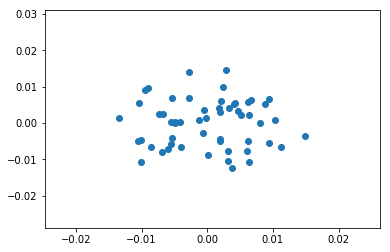

In [39]:
pyplot.scatter(points2D[:, 0], points2D[:,1])

Which word does a point represent? Let us tag them.

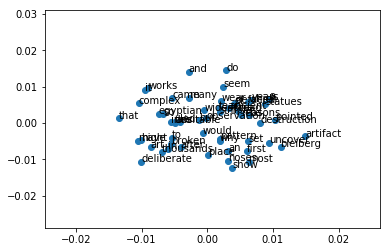

In [45]:
pyplot.scatter(points2D[:, 0], points2D[:,1])
for index, word in enumerate(words):
    pyplot.annotate(word, xy=(points2D[index,0], points2D[index,1]))

Now, let us a function which accepts a http address as input, extracts all the sentences (tagged by the `contextClass` in the webpage) from the webpage pointed by the address, computes word embeddings, and save them into an output file, plot the result with tagged words.
```
def computer_words_in_webpage(httpAddress   = 'http://...', 
                              contextClass  = '',
                              outputW2VFile = '/home/user/.../w2vWeb.bin':
    
```
We decompose this process into four steps:
* extract the webpage pointed by the http address
* transform these texts into a list of sentences, each sentence is a list of tokens
* use gensim to train word embeddings
* save the result into output file, and plot


We use `urllib.request` pacakge to retrieve the webpage pointed by 'https://edition.cnn.com/style/article/egyptian-statues-broken-noses-artsy/index.html', and `BeautifulSoup` package to retrieve texts.

### note: make sure that your computer is allowed to access and retrieve webpages

In [51]:
import urllib

In [46]:
from bs4 import BeautifulSoup

In [ ]:
webpage = ''
httpAddress = 'https://edition.cnn.com/style/article/egyptian-statues-broken-noses-artsy/index.html'
contextClass = 'Paragraph__component BasicArticle__paragraph BasicArticle__pad'
webpage = urllib.request.urlopen(httpAddress).read().decode('utf-8')

In [ ]:
print(len(webpage))

It would not print 0. 


# References

* Tomas Mikolov, Kai Chen, Greg Corrado,Jeffrey Dean (2013). Efficient Estimation of Word Representations in Vector Space. CoRR:abs/1301.3781. <a>http://arxiv.org/abs/1301.3781</a> 
* Jeffrey Pennington, Richard Socher,d Christopher D. Manning (2014). GloVe: Global Vectors for Word Representation. EMNLP-14. <a>https://nlp.stanford.edu/projects/glove/</a>
* Omer Levy and Yoav Goldberg (2014). Dependency-Based Word Embeddings. ACL-14. <a>https://levyomer.wordpress.com/2014/04/25/dependency-based-word-embeddings/2</a>

<p style="background-color:#66A5D1;padding-top:0.2em;padding-bottom: 0.2em" />

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; T. Dong, C. Bauckhage<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>